# Assignment 4

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Questions (10 pts)
### In all the following, `...` is the part you need to code


**Note:** Watch class sessions Object Oriented Programming and Visualization to complete this assignment.

<b> 1. Read the mpg.csv file (the mpg.csv is in the same folder as your Jupyter Notebook file) and create dataframe and name it 'mpg_df' (1 point)

In [2]:
#Work on your solution here and after. 
mpg_df = pd.read_csv('mpg.csv')

#Report results
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


<b> 2. Define a functions called Preprocessing that takes an input and performs the following steps on the input data(1 points):
  * Remove the 'car name' column
  * Change the column name 'model year' to 'year'
  * Drop rows with missing values.

In [3]:
#Work on your solution here and after. 

# creates the function Preprocessing
def Preprocessing(mpg_df):
    # drops the column named 'car name' (this does not change the original dataframe, hence the new named dataframe)
    mpg_df = mpg_df.drop('car name', axis=1)
    
    # renames the column 'model year' to 'year'
    mpg_df = mpg_df.rename(columns={'model year': 'year'})
    
    # drops rows with missing values 
    mpg_df = mpg_df.dropna()
    
    # returns value, ends function 
    return mpg_df
    
#Report results
mpg_updated = Preprocessing(mpg_df)
mpg_updated.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


<b> 3. ( 2 points) Assume 'mpg' is the target feature, and all other variables are the input features. Using your own knowledge from what you learned in the Visualization session, divide the input features into two groups. 

The first group will be the features that will be plotted against 'mpg' using scatter plot. Put their names as a list called `scatterplot_features`. 

The second group will be the features that will be plotted against 'mpg' using boxplot. Put their names as a list called `boxplot_features`.

JUST THE NAME OF THE FEATURE.

features that will be plotted against "mpg" using scatter plot: ['displacement', 'horsepower', 'weight', 'acceleration']


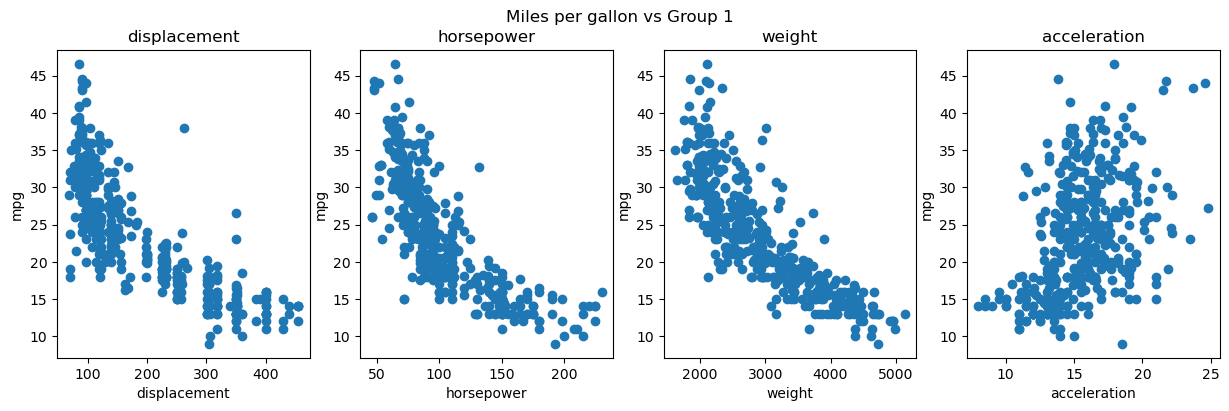

features that will be plotted against "mpg" using boxplot: ['cylinders', 'origin']


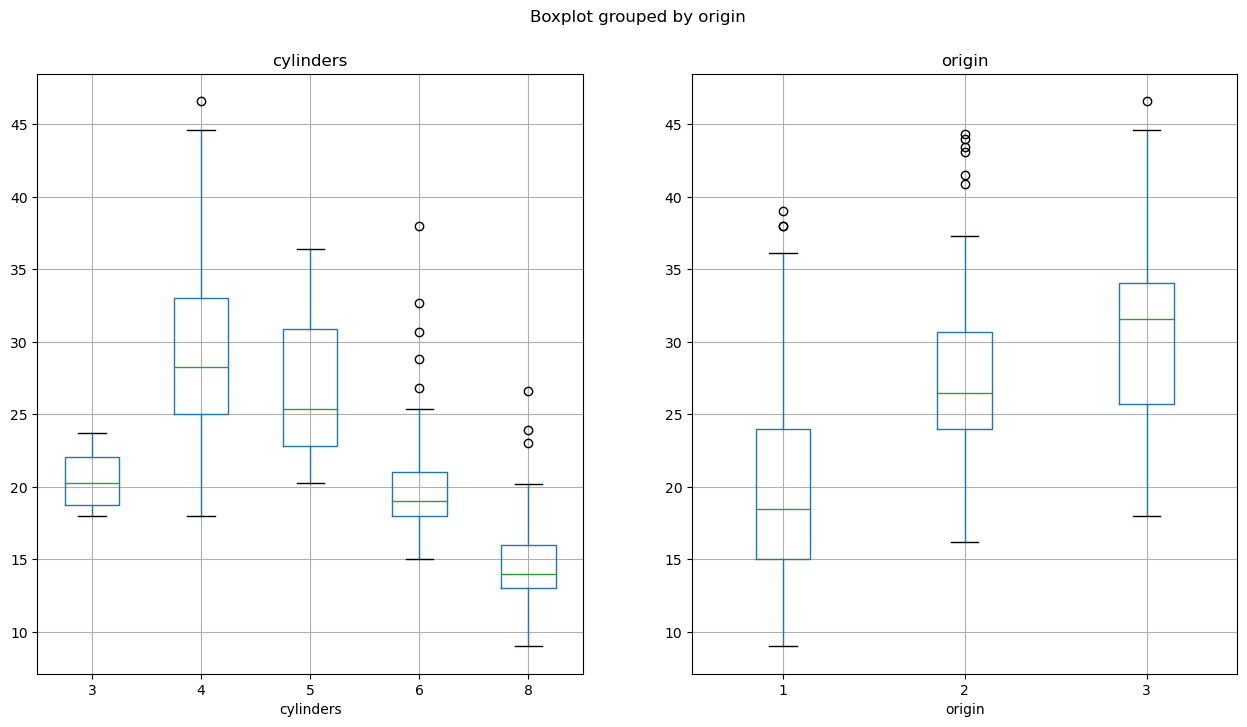

In [4]:
#Work on your solution here and after. 
# populate the two lists with the feature names such as
# scatterplot_features = ['feater1', 'feature2', ....] 
# boxplot_features = ['feater3', 'feature4', ....] 

# goes on y-axis bc its the target feature
target_feature = 'mpg'

# testing which variables to pick for either group 1 (scatter) or group 2 (boxplot)
#print(len(target_feature))
#column_list = mpg_df.columns.tolist()
#print(column_list)

scatterplot_features = ['displacement', 'horsepower', 'weight', 'acceleration']

# checks to make sure the list has the four input variables
#len(scatterplot_features)

boxplot_features = ['cylinders', 'origin']
#len(boxplot_features)

# Report results
print('features that will be plotted against "mpg" using scatter plot:', scatterplot_features)

fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 4))
plt.subplots_adjust(hspace=0.3)
fig.suptitle("Miles per gallon vs Group 1")
for column, ax in zip(scatterplot_features, axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.scatter(mpg_df[column], mpg_df['mpg'])
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('mpg')
plt.show()

print('features that will be plotted against "mpg" using boxplot:', boxplot_features)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
plt.subplots_adjust(hspace=0.3)
#title part of this doesnt work????
fig.suptitle("Miles per gallon vs Group 2")
#for column, ax in zip(boxplot_features, axs.ravel()):
    # filter df for ticker and plot on specified axes
   #  mpg_df.boxplot(column = 'mpg', by = column, ax=ax)
for i, column in enumerate(boxplot_features):
    ax = axs[i]
    # Filter 'mpg_df' for the current column and plot on the specified axis
    mpg_df.boxplot(column='mpg', by=column, ax=ax)
    ax.set_title(f"{column}")
plt.show()

<b> 4. (6 points)
Consider the following class called SampleVisualization. The input parameter is a pandas dataframe which will be stored in the class as variable `data`.

```
class SampleVisualization:
    def __init__(self, input_data):
        self.data = input_data.copy()
```

Create a child class from SampleVisualization, call it ChildSampleVisualization. In addition to the proper `__init__`, this new class needs to have two additional functions:
* visualize_scatter
* visualize_boxplot

Each of these functions accepts four parameters: target, input_features, plot_n_rows, plot_n_columns. The functions will then use these parameters and the class's variable `data` to create the plots similar to the Visualization session. The functions need to plot each variable in the `input_features` against the `target` as an ax in a plots_n_rows*plots_n_columns figure.

**HINT** You can modify the codes from Visualization session to define your functions:
```
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Housing prices vs features")
for column, ax in zip(to_plot_columns, axs.ravel()):
    # filter df for ticker and plot on specified axes
    ax.scatter(data[column], data['price'])
    
    # chart formatting
    ax.set_title(column)
    ax.set_xlabel(column)
    ax.set_ylabel('price')
plt.show()
```
and
```
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("Housing prices vs categorical features")
for column, ax in zip(categorical_columns, axs.ravel()):
    # filter df for ticker and plot on specified axes
    data.boxplot(column = 'price', by = column, ax=ax)
plt.show()
```



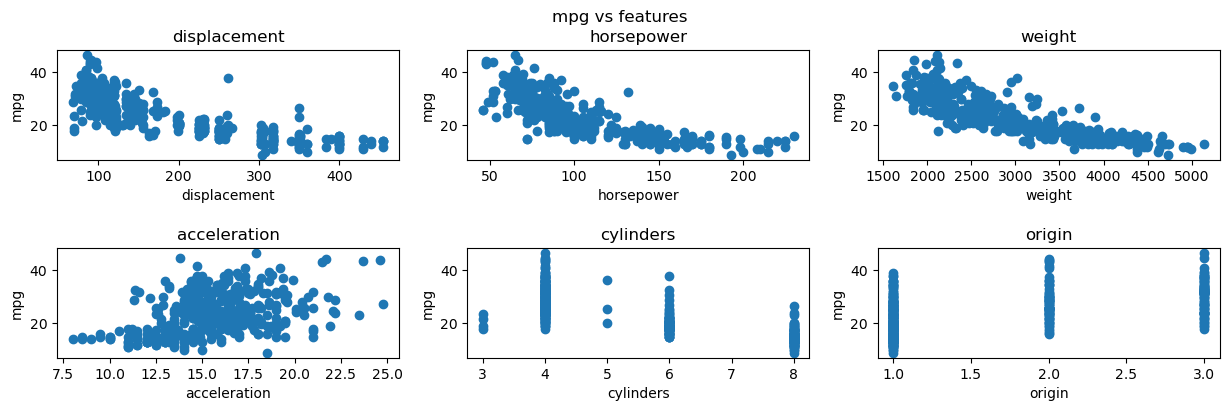

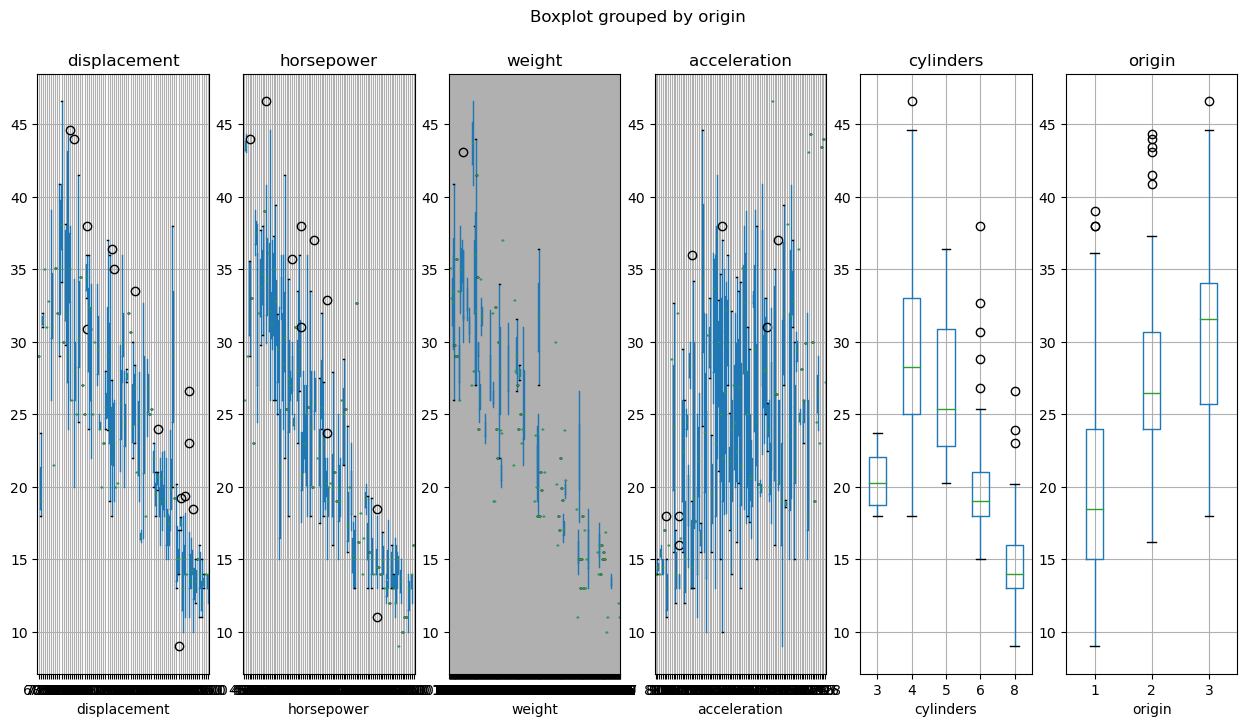

In [13]:
class SampleVisualization:
    def __init__(self, input_data):
        self.data = input_data.copy()
        
#Work on your solution here and after. 
class ChildSampleVisualization(SampleVisualization):
    def __init__(self, input_data):
        super().__init__(input_data)
    
    def visualize_scatter(self, target, input_features, plot_n_rows, plot_n_column):
        
        fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 4))
        plt.subplots_adjust(hspace=0.8)
        fig.suptitle("mpg vs features")
        for column, ax in zip(input_features, axs.ravel()):
            # filter df for ticker and plot on specified axes
            ax.scatter(mpg_df[column], mpg_df['mpg'])
             # chart formatting
            ax.set_title(column)
            ax.set_xlabel(column)
            ax.set_ylabel('mpg')
            
        plt.show()
        
    def visualize_boxplot(self, target, input_features, plot_n_rows, plot_n_column):

        fig, axs = plt.subplots(nrows=1, ncols=6, figsize=(15, 8))
        plt.subplots_adjust(hspace=0.3)
        #title part of this doesnt work????
        fig.suptitle("mpg vs categorical features")
        #for column, ax in zip(boxplot_features, axs.ravel()):
        # filter df for ticker and plot on specified axes
        # mpg_df.boxplot(column = 'mpg', by = column, ax=ax)
        
        # huh, works better than the below code
        for i, column in enumerate(input_features):
            ax = axs[i]
            # Filter 'mpg_df' for the current column and plot on the specified axis
            mpg_df.boxplot(column='mpg', by=column, ax=ax)
            ax.set_title(f"{column}")
            
        # strange output below (doesnt even get through all the data???)
        # even weirder that it won't even compile if I dont play around with the rows and columns formatting
        # weird its only for the data that doesnt even belong in the boxplot anyways
        #for i, column in enumerate(input_features):
            #ax = axs[i // plot_n_column, i % plot_n_column]
            #self.data.boxplot(column=target, by=column, ax=ax)
            #ax.set_title(f"{column}")
            
        plt.show()
        
test = ChildSampleVisualization(mpg_df)
target = 'mpg'
input_features = ['displacement', 'horsepower', 'weight', 'acceleration', 'cylinders', 'origin'] 
plot_n_column = len(input_features)
plot_n_rows = len(mpg_df['mpg'])
test.visualize_scatter(target, input_features, plot_n_rows, plot_n_column)
test.visualize_boxplot(target, input_features, plot_n_rows, plot_n_column)

<b> 5. Create an object using the class that you defined by passing `mpg_updated` as the input dataframe.
Pass the `target_feature` from question 3 and the `scatterplot_features` that you created in Question 3 to `visualize_scatter` in your created object to plot the scatter plots.
Pass the `target_feature` from question 3 and the `boxplot_features` that you created in Question 3 to `visualize_boxplot` in your created object to plot the box plots.

**Note**: You also need to define the your own appropriate `plots_n_rows` and `plots_n_columns` for each of the functions

In [ ]:
#Work on your solution here and after. 
visualization_object = ChildSampleVisualization(mpg_updated)

In [ ]:
visualization_object.visualize_scatter(target=target_feature, input_features=scatterplot_features,
                                       plot_n_rows=..., plot_n_columns=...)

In [ ]:
visualization_object.visualize_boxplot(target=target_feature, input_features=boxplot_features,
                                       plot_n_rows=..., plot_n_columns=...)